1. Import Libraries
2. Load and Preview the Data

In [27]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Load the dataset
file_path = r'C:\Users\jared\Desktop\Work\Education\DS_522\522_Teams\earthquakes.csv'
data = pd.read_csv(file_path)

# Preview the data
print(data.head())
print(data.info())

           id  magnitude        type  \
0  us7000necw        4.8  earthquake   
1  tx2024shcj        5.1  earthquake   
2  ci40734823        3.7  earthquake   
3  tx2024scvz        3.9  earthquake   
4  us7000ndte        4.1  earthquake   

                                        title                 date  \
0         M 4.8 - 33 km WSW of Ackerly, Texas  2024-09-17T00:49:42   
1         M 5.1 - 34 km WSW of Ackerly, Texas  2024-09-17T00:49:42   
2                M 3.7 - 6 km N of Malibu, CA  2024-09-16T11:22:08   
3  M 3.9 - 58 km S of Whites City, New Mexico  2024-09-14T17:01:06   
4  M 4.1 - 60 km S of Whites City, New Mexico  2024-09-14T17:01:06   

            time        updated  \
0  1726534182289  1726583895255   
1  1726534182183  1726672002991   
2  1726485728190  1726637414586   
3  1726333266539  1726584426218   
4  1726333266382  1726334616179   

                                                 url  \
0  https://earthquake.usgs.gov/earthquakes/eventp...   
1  https://eart

3. Data Cleaning and Preprocessing

In [28]:
# Handle missing values
data = data.dropna()

# Convert date to datetime if applicable
if 'date' in data.columns:
    data['date'] = pd.to_datetime(data['date'])

# Feature engineering: Extract year, month, and day
if 'date' in data.columns:
    data['year'] = data['date'].dt.year
    data['month'] = data['date'].dt.month
    data['day'] = data['date'].dt.day

# Filter data for significant earthquakes (magnitude > 5)
significant_quakes = data[data['magnitude'] > 5]

print(significant_quakes.describe())

       magnitude                           date          time       updated  \
count  10.000000                             10  1.000000e+01  1.000000e+01   
mean    5.116000            2024-06-22 07:59:56  1.719043e+12  1.724600e+12   
min     5.060000            2024-02-03 05:24:28  1.706938e+12  1.706941e+12   
25%     5.100000  2024-03-17 19:40:28.249999872  1.710704e+12  1.726368e+12   
50%     5.100000     2024-08-01 09:19:12.500000  1.722504e+12  1.726614e+12   
75%     5.100000     2024-09-06 19:39:45.500000  1.725652e+12  1.726662e+12   
max     5.220000            2024-09-17 00:49:42  1.726534e+12  1.726672e+12   
std     0.057194                            NaN  8.543147e+09  6.206413e+09   

               felt        cdi        mmi    tsunami          sig         nst  \
count     10.000000  10.000000  10.000000  10.000000    10.000000   10.000000   
mean    8559.200000   6.400000   6.200000   0.200000  1008.000000   54.000000   
min      382.000000   6.000000   5.000000   0

4. Exploratory Data Analysis (EDA)

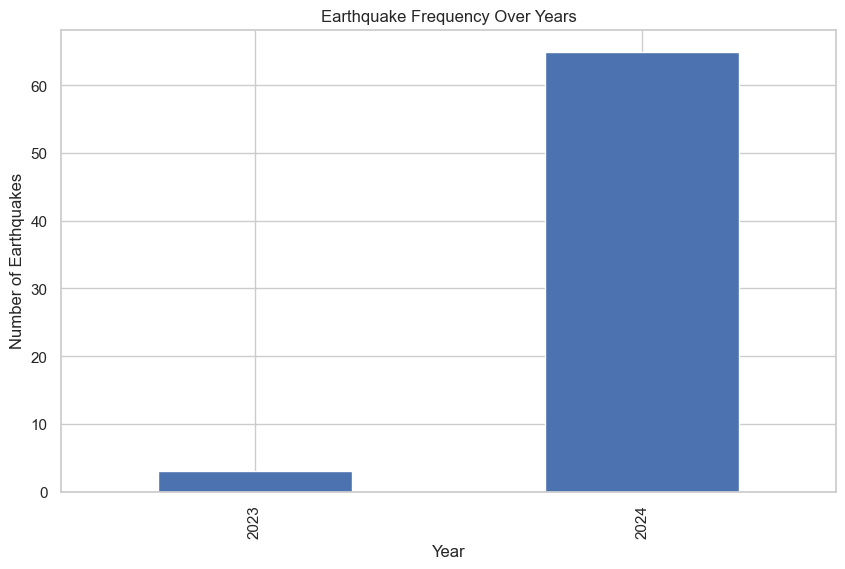

In [29]:
#4.1 Earthquake Frequency Over Time
plt.figure(figsize=(10, 6))
data['year'].value_counts().sort_index().plot(kind='bar')
plt.title('Earthquake Frequency Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Earthquakes')
plt.show()


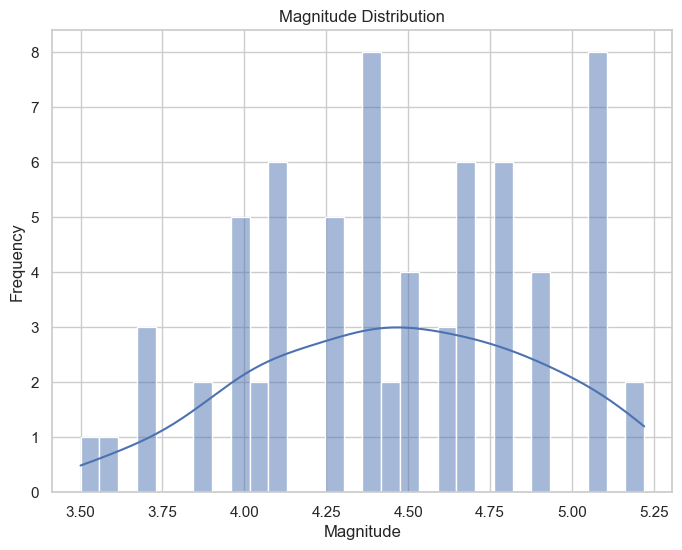

In [31]:
#4.2 Magnitude Distribution
plt.figure(figsize=(8, 6))
sns.histplot(data['magnitude'], bins=30, kde=True)
plt.title('Magnitude Distribution')
plt.xlabel('Magnitude')
plt.ylabel('Frequency')
plt.show()

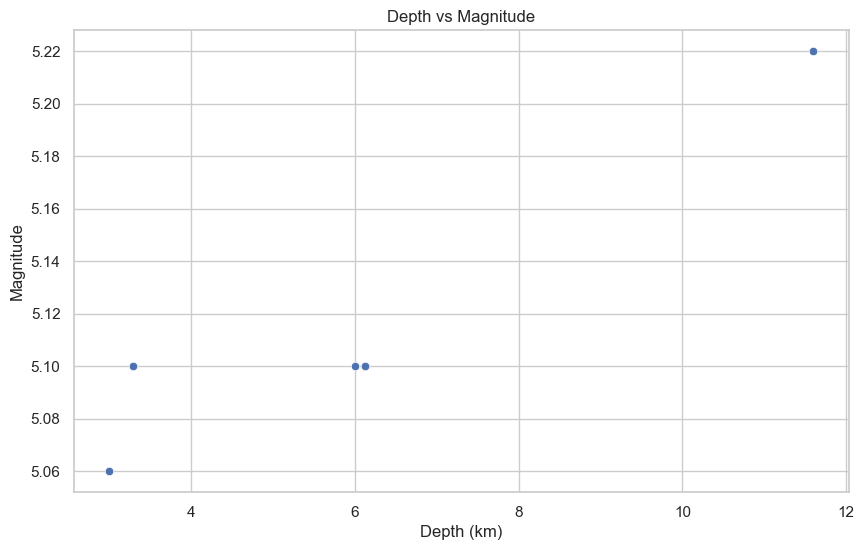

In [32]:
# 4.3 Depth vs Magnitude
plt.figure(figsize=(10, 6))
sns.scatterplot(x='depth', y='magnitude', data=significant_quakes)
plt.title('Depth vs Magnitude')
plt.xlabel('Depth (km)')
plt.ylabel('Magnitude')
plt.show()

5. Predictive Modeling

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21



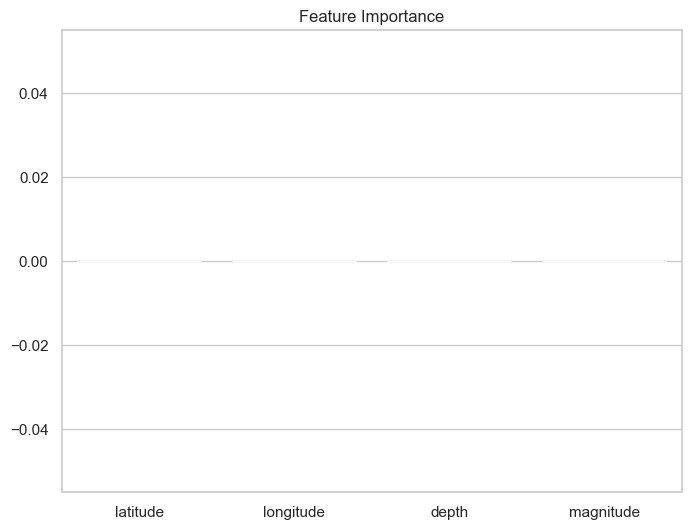

In [33]:
### 5.1 Preparing the Data
# Select features and target
features = ['latitude', 'longitude', 'depth', 'magnitude']
target = 'high_magnitude'  # Define earthquakes above 7.0 as high magnitude
data['high_magnitude'] = (data['magnitude'] > 7.0).astype(int)

# Split the data
X = data[features]
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### 5.2 Random Forest Model
# Train Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Feature Importance
importances = model.feature_importances_
plt.figure(figsize=(8, 6))
sns.barplot(x=features, y=importances)
plt.title('Feature Importance')
plt.show()

6. Visualization of Results

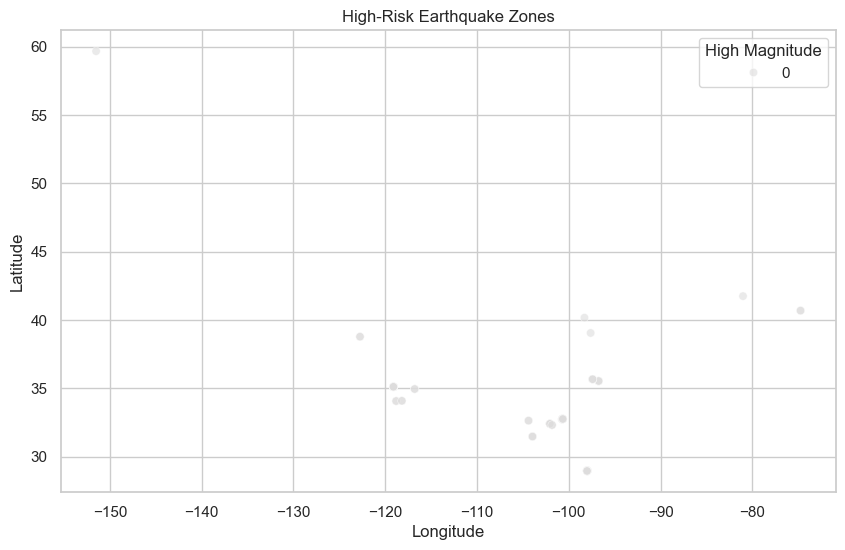

In [34]:
# 6.1 High-Risk Zones (Map Visualization)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='longitude', y='latitude', hue='high_magnitude', data=data, palette='coolwarm', alpha=0.6)
plt.title('High-Risk Earthquake Zones')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='High Magnitude')
plt.show()

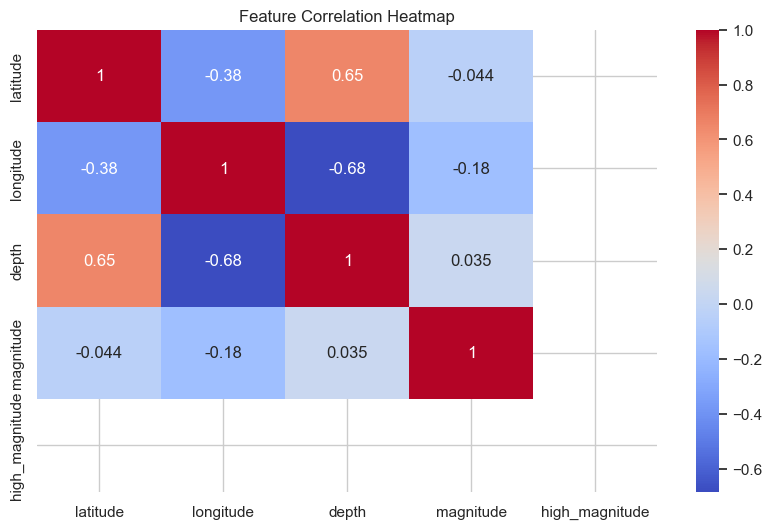

In [35]:
# 6.2 Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(data[features + [target]].corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()